In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pylab as pylab

In [4]:
data=pd.read_excel('dcard posts meta 1901-2004 828476 rows.xlsx')

In [5]:
data.columns

Index(['id', '標題(title)', '摘錄(excerpt)', '匿名學校(anonymousSchool)',
       '匿名系所(anonymousDepartment)', '置頂(pinned)', 'forumId', 'replyId',
       '發文時間(createdAt)', '文章更新時間(updatedAt)', '回應數(commentCount)',
       '按讚數(likeCount)', 'tags', '看板中文名稱(forumName)', '看板英文名稱(forumAlias)',
       '作者性別(gender)', '學校(school)', '系所(department)', '文章連結'],
      dtype='object')

In [7]:
dataF=data[data['作者性別(gender)']=='F']
dataM=data[data['作者性別(gender)']=='M']

## Exploratory Data Analysis

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

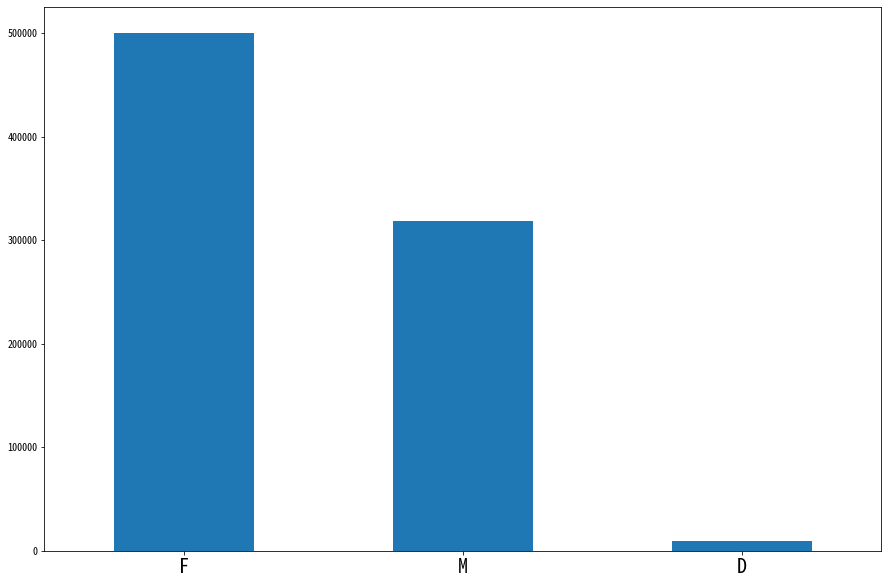

In [110]:
# Gender distribution
data['作者性別(gender)'].value_counts().plot(kind='bar')
plt.xticks(fontsize=20)
plt.xticks(rotation=0)

In [112]:
top30=list(data['看板中文名稱(forumName)'].value_counts().head(30).index)

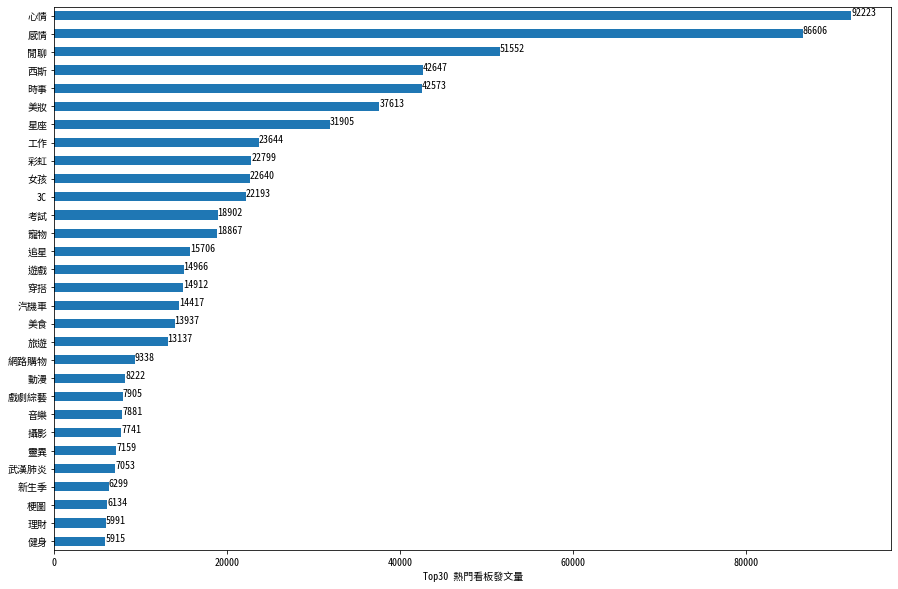

In [113]:
# Top 30 popular forums
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Noto Sans Mono CJK TC']
params = {'figure.figsize': (15, 10)}
pylab.rcParams.update(params)
data['看板中文名稱(forumName)'].value_counts().head(30).plot(kind='barh').invert_yaxis()

plt.xlabel('Top30 熱門看板發文量')

for i, v in enumerate(data['看板中文名稱(forumName)'].value_counts().head(30)):
    plt.text(v, i, v)

Text(0.5, 0, '男性 Top20熱門看板')

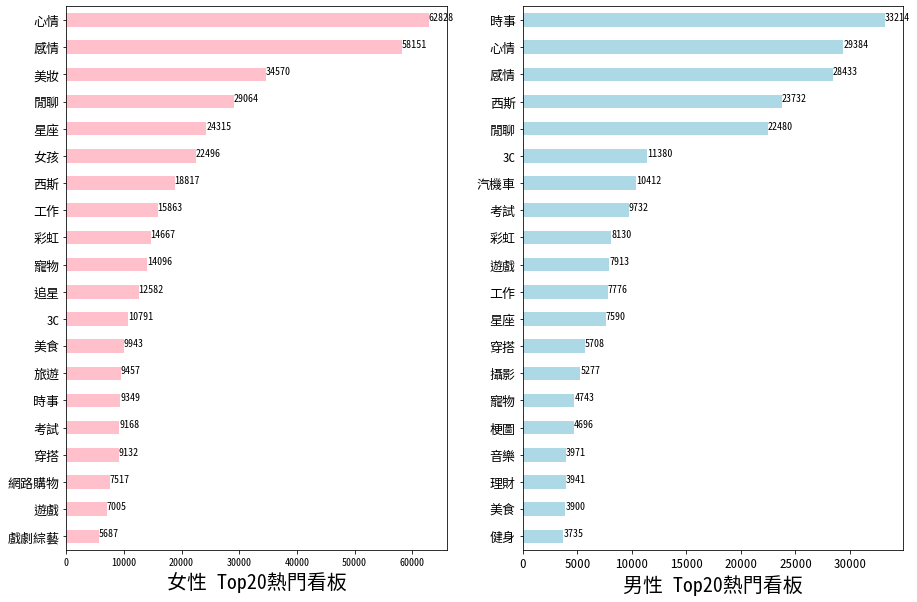

In [84]:
# pop forum by genders
dataF=data[data['作者性別(gender)']=='F']
dataM=data[data['作者性別(gender)']=='M']
plt.subplot(1, 2, 1)

dataF['看板中文名稱(forumName)'].value_counts().head(20).plot(kind='barh',color='pink',fontsize=13).invert_yaxis()
for i, v in enumerate(dataF['看板中文名稱(forumName)'].value_counts().head(20)):
    plt.text(v, i, v)
plt.xlabel('女性 Top20熱門看板',fontsize=20)
plt.xticks(fontsize=10)

plt.subplot(1, 2, 2)
ax2=dataM['看板中文名稱(forumName)'].value_counts().head(20).plot(kind='barh',color='lightblue',fontsize=13).invert_yaxis()
for i, v in enumerate(dataM['看板中文名稱(forumName)'].value_counts().head(20)):
    plt.text(v, i, v)
plt.xlabel('男性 Top20熱門看板',fontsize=20)

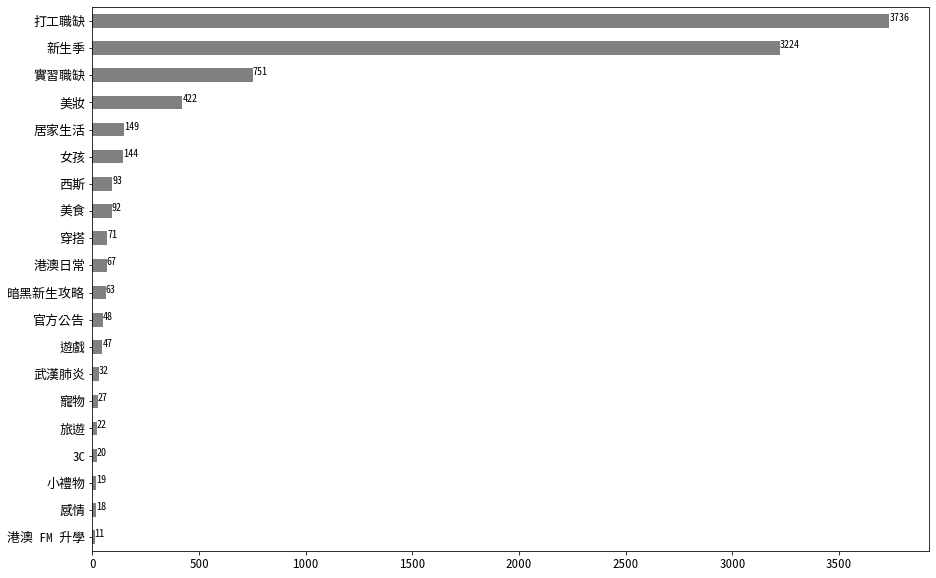

In [85]:
params = {'figure.figsize': (15, 10)}
pylab.rcParams.update(params)
dataD=data[data['作者性別(gender)']=='D']

dataD['看板中文名稱(forumName)'].value_counts().head(20).plot(kind='barh',color='gray',fontsize=13).invert_yaxis()
for i, v in enumerate(dataD['看板中文名稱(forumName)'].value_counts().head(20)):
    plt.text(v, i, v)


In [114]:
top30=list(data['看板中文名稱(forumName)'].value_counts().head(30).index)

In [115]:
top30df=data.loc[data['看板中文名稱(forumName)'].isin(top30)]

In [451]:
L=list(top30df.groupby('看板中文名稱(forumName)')['回應數(commentCount)'].median().sort_values(ascending=False).index)

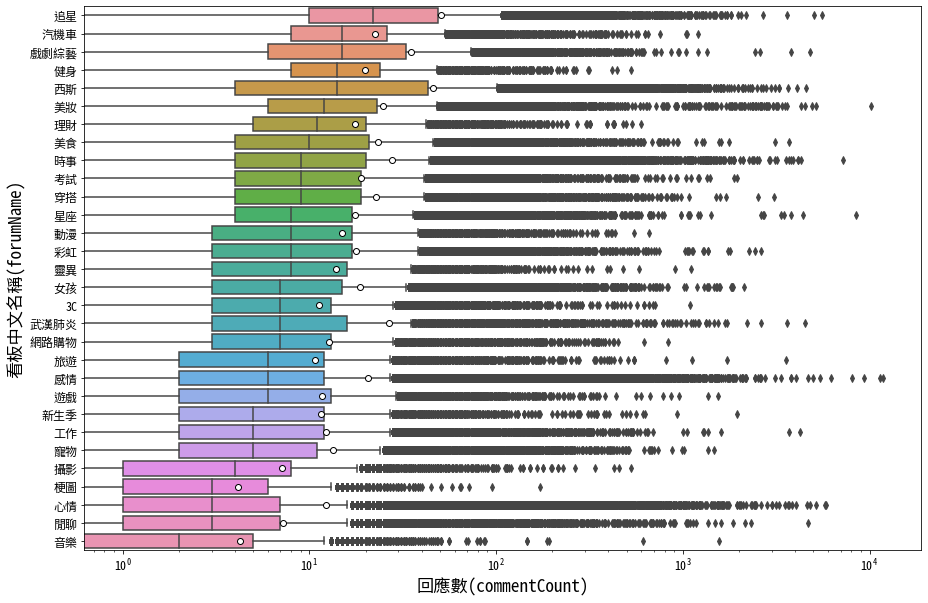

In [454]:
import seaborn as sns
ax = sns.boxplot(y="看板中文名稱(forumName)", x="回應數(commentCount)", data=top30df,order=L,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
ax.set_xscale("log")

## 男性v.s女性用戶的使用差異-以3C板為例


### 1-文章標籤量比較 (以dcard平台標記的文章tags計算)

In [ ]:
F3Cdata=data[(data['看板中文名稱(forumName)']=='3C')&(data['作者性別(gender)']=='F')]
M3Cdata=data[(data['看板中文名稱(forumName)']=='3C')&(data['作者性別(gender)']=='M')]

In [238]:
#女性用戶文章標籤分析
F3Cdata['tags1']=F3Cdata['tags'].fillna('')
F3Cdata['tags1']=F3Cdata['tags1'].astype(str)
F3Cdata['tags1']=F3Cdata['tags'].apply(lambda x: str(x).replace(' ',''))
F3Cdata['tagA']=F3Cdata.apply(lambda row: row['tags1'].split(','),axis=1)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
from collections import Counter
import re
L=[]

for i in F3Cdata['tagA']:
    for i2 in i:
        L.append(i2)
        
K=Counter(L)
df=pd.DataFrame.from_dict(K, orient='index').reset_index().sort_values(by=0,ascending=False)

In [284]:
F3Cdata.shape

(10791, 21)

In [285]:
df['percentage']=df[0]/10791

In [288]:
ddf=df.set_index('index')['percentage'].to_dict() 
del ddf['nan']

In [320]:
font="Hiragino Sans GB.ttc"
wordcloud = WordCloud(background_color='white',font_path=font, max_words=80).generate_from_frequencies(ddf)

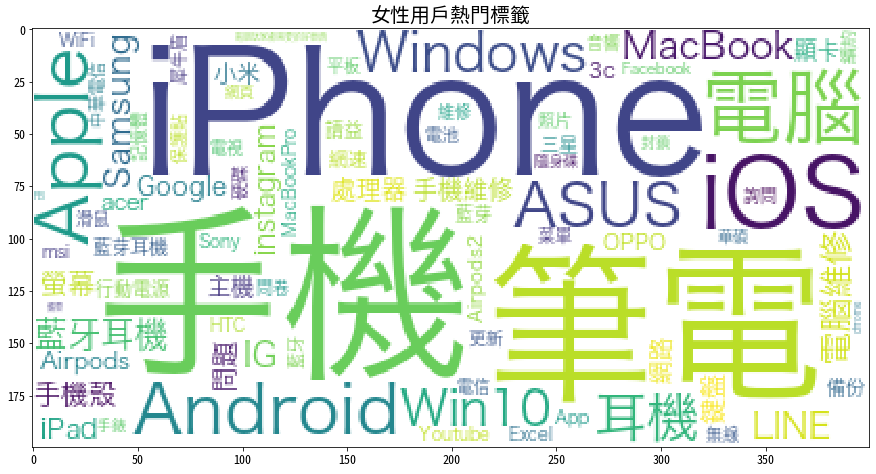

In [335]:
plt.title('女性用戶熱門標籤',fontsize=20)
plt.imshow(wordcloud)

In [250]:
#男性用戶文章標籤分析
M3Cdata['tags1']=M3Cdata['tags'].fillna('')
M3Cdata['tags1']=M3Cdata['tags1'].astype(str)
M3Cdata['tags1']=M3Cdata['tags'].apply(lambda x: str(x).replace(' ',''))
M3Cdata['tagA']=M3Cdata.apply(lambda row: row['tags1'].split(','),axis=1)

L2=[]

for i in M3Cdata['tagA']:
    for i2 in i:
        L2.append(i2)
        
K2=Counter(L2)
df2=pd.DataFrame.from_dict(K2, orient='index').reset_index().sort_values(by=0,ascending=False)


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

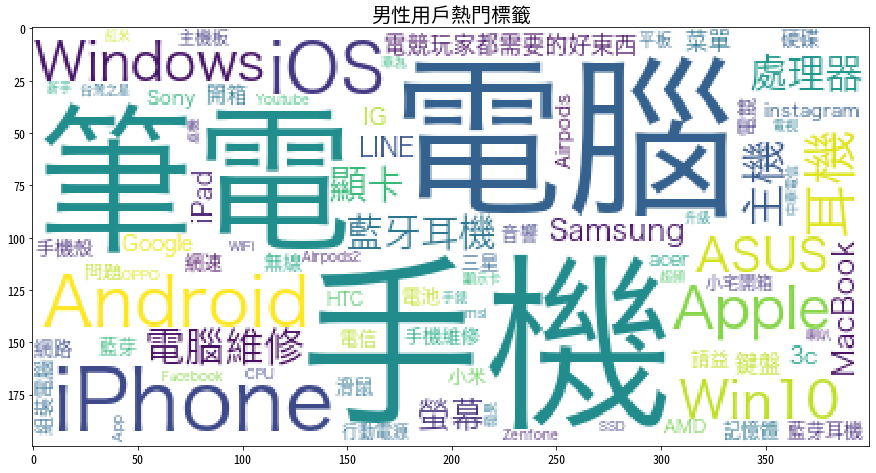

In [333]:
df2['percentage']=df2[0]/df2.shape[0]
ddf2=df2.set_index('index')['percentage'].to_dict()
del ddf2['nan']
wordcloud2 = WordCloud(background_color='white',font_path=font, max_words=80).generate_from_frequencies(ddf2)
plt.title('男性用戶熱門標籤',fontsize=20)
plt.imshow(wordcloud2)

### 2-發文主題比較 (LDA主題模型分析）

In [190]:
#女性發文主題分析


import jieba
# 讀取中文語料庫
jieba.load_userdict("dict.txt.big.txt")

# 讀取 stop words
STOP_WORDS_DIR = 'stopwords.txt'
with open(STOP_WORDS_DIR, encoding='utf8') as f:
    stop_words = f.read().splitlines() 
import string
exclude = set(string.punctuation) 
for i in ['」','『','』','【','】',"?",'。','、',' ','》','《','...','…','↓','■','’','....','❤','~','✔','➤','〉','〈','-','✶','¨','☀','✨','_',"❓",'❌','❗','◆','◆','.','⭐','-','✓','●','”','“','►']:
    exclude.add(i)

F3Cdata=data[(data['看板中文名稱(forumName)']=='3C')&(data['作者性別(gender)']=='F')]
text=list(F3Cdata["摘錄(excerpt)"])
import re
# 去除雜訊字

# 去除繁體中文以外的英文、數字、符號
rule = re.compile(r"[^\u4e00-\u9fa5]")
speech_list = [list(jieba.cut(rule.sub('', str(speech)))) for speech in text]

# for idx, speech in enumerate(speech_list):    
#     speech_list[idx] = ' '.join([word for word in speech if word not in stop_words and word not in exclude])

for idx, speech in enumerate(speech_list):
    speech_list[idx] = [word for word in speech if (word not in stop_words)& (word not in exclude) ]
    
id2word = corpora.Dictionary(speech_list)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in speech_list]

In [196]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=3,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

[(0,
  '0.113*"手機" + 0.027*"更新" + 0.022*"上網" + 0.017*"朋友" + 0.014*"購入" + 0.013*"價格" '
  '+ 0.012*"訊息" + 0.011*"三星" + 0.010*"充電" + 0.009*"換了"'),
 (1,
  '0.082*"筆電" + 0.049*"網路" + 0.023*"方法" + 0.017*"選擇" + 0.017*"這台" + 0.017*"問問" '
  '+ 0.016*"硬碟" + 0.014*"網路上" + 0.012*"不行" + 0.012*"看過"'),
 (2,
  '0.039*"影片" + 0.026*"顯示" + 0.023*"畫面" + 0.017*"照片" + 0.016*"很久" + 0.015*"登入" '
  '+ 0.015*"相機" + 0.012*"明明" + 0.011*"分享" + 0.010*"備份"'),
 (3,
  '0.023*"聲音" + 0.021*"幾天" + 0.021*"耳機" + 0.017*"打字" + 0.016*"下載" + 0.014*"解決" '
  '+ 0.013*"功能" + 0.012*"有時候" + 0.012*"拍照" + 0.012*"鏡頭"'),
 (4,
  '0.065*"電腦" + 0.029*"螢幕" + 0.027*"推薦" + 0.020*"需求" + 0.018*"想買" + 0.017*"開機" '
  '+ 0.017*"原本" + 0.016*"預算" + 0.016*"選手" + 0.013*"謝謝"')]


In [197]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=speech_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7785,"聲音, 幾天, 耳機, 打字, 下載, 解決, 功能, 有時候, 拍照, 鏡頭","[喇叭, 爆音, 解決, 陪伴, 好幾年, 音樂, 一半, 變爆音, 耳機, 左邊, 喇叭,..."
1,1,0.0,0.5198,"手機, 更新, 上網, 朋友, 購入, 價格, 訊息, 三星, 充電, 換了","[人手, 機會, 好幾下, 黑屏, 一下子, 白點, 不見, 原因, 解決]"
2,2,4.0,0.4701,"電腦, 螢幕, 推薦, 需求, 想買, 開機, 原本, 預算, 選手, 謝謝","[家機, 電腦, 螢幕, 鍵盤, 滑鼠, 主機, 開機, 一聲, 這會, 關掉, 電源, 按..."
3,3,0.0,0.3933,"手機, 更新, 上網, 朋友, 購入, 價格, 訊息, 三星, 充電, 換了","[新年快樂, 家裡, 印表機, 掛了, 第一天, 錢包, 上網, 幾台, 猶豫不決, 學生,..."
4,4,0.0,0.3852,"手機, 更新, 上網, 朋友, 購入, 價格, 訊息, 三星, 充電, 換了","[這位, 朋友, 上網, 估狗, 半天, 答案, 解惑, 感恩]"
5,5,2.0,0.8571,"影片, 顯示, 畫面, 照片, 很久, 登入, 相機, 明明, 分享, 備份","[實名, 認證, 輸入, 證號, 金融, 顯示]"
6,6,2.0,0.4715,"影片, 顯示, 畫面, 照片, 很久, 登入, 相機, 明明, 分享, 備份","[相機, 遊戲, 第五, 人格, 入手, 要換]"
7,7,2.0,0.6600,"影片, 顯示, 畫面, 照片, 很久, 登入, 相機, 明明, 分享, 備份","[畫面, 重複, 幾次, 登入, 跳開, 依然, 重複, 登入, 曉得, 導致, 登入, 求解]"
8,8,1.0,0.4749,"筆電, 網路, 方法, 選擇, 這台, 問問, 硬碟, 網路上, 不行, 看過","[把握, 跨年, 連假, 家人, 出門, 出門, 塞車, 爸媽, 鹿港, 天后, 擁擠, 路..."
9,9,0.0,0.9555,"手機, 更新, 上網, 朋友, 購入, 價格, 訊息, 三星, 充電, 換了","[早上, 起床, 手機, 訊息, 更新, 更新, 更新, 手機, 解鎖, 指紋, 打開, 解..."


In [203]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis


pyLDAvis.save_html(vis, 'Female3CLDA.html')

In [202]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.333833 -0.029948       1        1  24.738504
0     -0.075885  0.212022       2        1  21.882795
3     -0.060005  0.161096       3        1  19.698469
2     -0.157531 -0.186866       4        1  19.002066
1     -0.040412 -0.156304       5        1  14.678168, topic_info=     Term         Freq        Total Category  logprob  loglift
107    手機  3737.000000  3737.000000  Default  30.0000  30.0000
272    筆電  1822.000000  1822.000000  Default  29.0000  29.0000
42     電腦  2437.000000  2437.000000  Default  28.0000  28.0000
282    網路  1085.000000  1085.000000  Default  27.0000  27.0000
426    影片  1135.000000  1135.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
146    刪掉   111.236816   112.033417   Topic5  -5.2965   1.9117
161    月底   126.144348   127.049736   Topic5  -5.1707   1.9117
1156   一條   102.421463   103.217255   Topic5  -5.3790   1.9111
1798   連接    96.300407    97.091385   Topic5  -5.4407   1.9106
2042   邊邊   112.300728   115.037514   Topic5  -5.2869   1.8947

[191 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1156      5  0.988207   一條
357       2  0.998066   三星
46        2  0.998467   上網
289       3  0.997749   下載
516       3  0.995244   下面
...     ...       ...  ...
853       5  0.994597   頁面
307       1  0.998301   預算
571       3  0.995210   類似
72        4  0.998508   顯示
397       3  0.996103   麻煩

[173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 3, 2])

In [204]:
#男性發文主題分析

M3Cdata=data[(data['看板中文名稱(forumName)']=='3C')&(data['作者性別(gender)']=='M')]
text=list(M3Cdata["摘錄(excerpt)"])
import re
# 去除雜訊字

# 去除繁體中文以外的英文、數字、符號
rule = re.compile(r"[^\u4e00-\u9fa5]")
speech_list = [list(jieba.cut(rule.sub('', str(speech)))) for speech in text]

# for idx, speech in enumerate(speech_list):    
#     speech_list[idx] = ' '.join([word for word in speech if word not in stop_words and word not in exclude])

for idx, speech in enumerate(speech_list):
    speech_list[idx] = [word for word in speech if (word not in stop_words)& (word not in exclude) ]
    
id2word = corpora.Dictionary(speech_list)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in speech_list]

In [206]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=3,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [207]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis


pyLDAvis.save_html(vis, 'Male3CLDA.html')

In [208]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.268186  0.064757       1        1  23.321857
4     -0.202462 -0.134921       2        1  21.089548
1     -0.139326  0.279133       3        1  20.215797
0      0.016931 -0.152231       4        1  18.288843
2      0.056672 -0.056738       5        1  17.083963, topic_info=     Term         Freq        Total Category  logprob  loglift
19     手機  3240.000000  3240.000000  Default  30.0000  30.0000
85     電腦  2412.000000  2412.000000  Default  29.0000  29.0000
36     螢幕  2043.000000  2043.000000  Default  28.0000  28.0000
105    筆電  1408.000000  1408.000000  Default  27.0000  27.0000
3      小弟  1411.000000  1411.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
3613   不高   183.002487   184.607483   Topic5  -4.9679   1.7583
390    同步   121.466957   122.605034   Topic5  -5.3777   1.7577
1949   心動   101.810432   102.643097   Topic5  -5.5543   1.7589
2221   附上   107.601135   108.846313   Topic5  -5.4989   1.7555
2235   直播   157.934891   168.663681   Topic5  -5.1152   1.7013

[190 rows x 6 columns], token_table=      Topic      Freq Term
term                      
852       4  0.992087   一條
725       2  0.992461   一隻
69        5  0.996074   一顆
902       3  0.997515   三星
94        1  0.999116   上網
...     ...       ...  ...
41        2  0.999107   顯示
153       1  0.997625   風扇
471       1  0.997605   高手
1831      3  0.995913  麥克風
500       4  0.995041   麻煩

[173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 1, 3])

## 3. 閒聊版/時事版 標題關鍵字TFIDF

In [8]:
Ftkdata=data[(data['看板中文名稱(forumName)']=='閒聊')&(data['作者性別(gender)']=='F')]
Mtkdata=data[(data['看板中文名稱(forumName)']=='閒聊')&(data['作者性別(gender)']=='M')]

In [460]:
Ftddata=data[(data['看板中文名稱(forumName)']=='時事')&(data['作者性別(gender)']=='F')]
Mtddata=data[(data['看板中文名稱(forumName)']=='時事')&(data['作者性別(gender)']=='M')]

In [9]:
import jieba
# 讀取中文語料庫
jieba.load_userdict("dict.txt.big.txt")

# 讀取 stop words
STOP_WORDS_DIR = 'stopwords.txt'
with open(STOP_WORDS_DIR, encoding='utf8') as f:
    stop_words = f.read().splitlines() 
import string
exclude = set(string.punctuation) 
for i in ['」','『','』','【','】',"?",'。','、',' ','》','《','...','…','↓','■','’','....','❤','~','✔','➤','〉','〈','-','✶','¨','☀','✨','_',"❓",'❌','❗','◆','◆','.','⭐','-','✓','●','”','“','►']:
    exclude.add(i)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/fv/y73mfqjs015g0j6bj36cf1lh0000gn/T/jieba.cache
Loading model cost 0.909 seconds.
Prefix dict has been built successfully.


In [64]:
text=list(Mtkdata["標題(title)"])

Ccorpus=[x for x in text if str(x) != 'nan']






# 去除雜訊字

# 去除繁體中文以外的英文、數字、符號
# rule = re.compile(r"[^\u4e00-\u9fff]")
speech_list = [list(jieba.cut(str(speech))) for speech in Ccorpus]
# speech_list = [list(jieba.cut(rule.sub('', str(speech)))) for speech in Ccorpus]
for idx, speech in enumerate(speech_list):
    speech_list[idx] = ' '.join([word for word in speech if word not in stop_words])
    

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern='[a-zA-Z\u4e00-\u9fff]{2,6}',
                             max_df=0.9,   # if it's found in all documents (100% or 1.0) then it's ignored.
                             min_df=1,   # If my term is found in only 1 document, then it's ignored
                             max_features=200)


X = vectorizer.fit_transform(speech_list)
terms = vectorizer.get_feature_names()
tf_idf = pd.DataFrame(X.toarray().transpose(), index=terms)
tf_idf = tf_idf.sum(axis=1)
score = pd.DataFrame(tf_idf, columns=["score"])
score["term"] = terms
score.sort_values(by="score", ascending=False, inplace=True)
score 

,score,term
女生,339.928437,女生
ig,260.013013,ig
朋友,201.421511,朋友
男生,179.851519,男生
大學,163.741505,大學
...,...,...
muse,24.752740,muse
男友,24.696127,男友
cc,24.676000,cc
封鎖,23.997083,封鎖


In [45]:
L=['推薦','問卷','分享','台灣','求解','詢問','東西','請益','選擇','尋找','幫忙','疑問']
for i in L:
    stop_words.append(i)

In [57]:
ftk=score['score'][:50].to_dict()

In [66]:
mtk=score['score'][:50].to_dict()

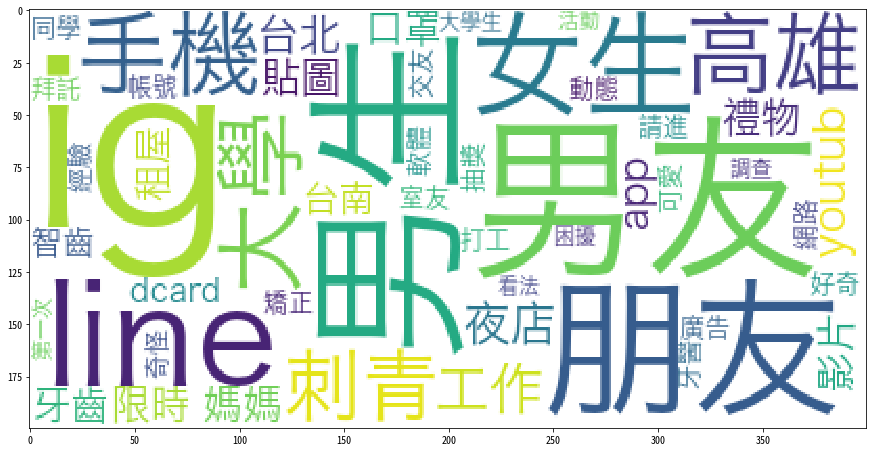

In [63]:
#女性用戶閒聊關鍵話題
from wordcloud import WordCloud
font="Hiragino Sans GB.ttc"
wordcloud = WordCloud(background_color='white',font_path=font, max_words=80).generate_from_frequencies(ftk)
plt.imshow(wordcloud)

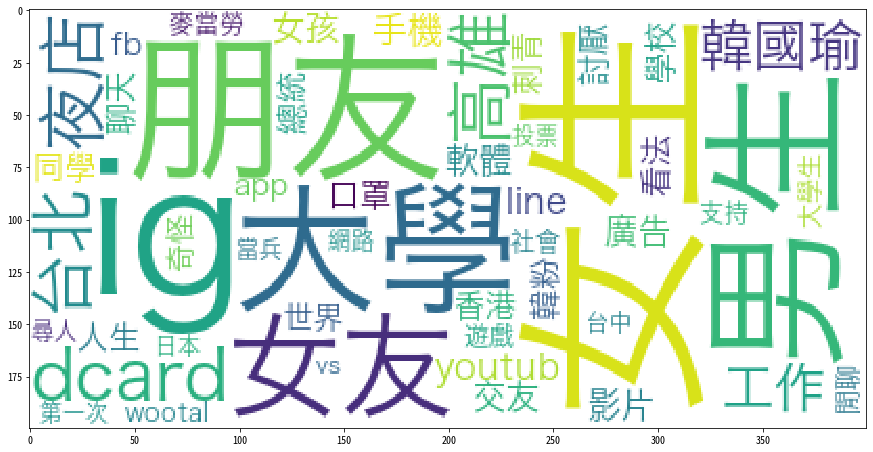

In [67]:
#男性用戶閒聊關鍵話題
from wordcloud import WordCloud
font="Hiragino Sans GB.ttc"
wordcloud = WordCloud(background_color='white',font_path=font, max_words=80).generate_from_frequencies(mtk)
plt.imshow(wordcloud)

In [580]:
text=list(Mtddata["摘錄(excerpt)"])
Ccorpus=[x for x in text if str(x) != 'nan']
import re
# 去除雜訊字

# 去除繁體中文以外的英文、數字、符號
# rule = re.compile(r"[^\u4e00-\u9fa5]")
# rule = re.compile('\^(.+?)(\u0040\u0040[0-9]+)?(\u0040\u0040[a-z]+)?$', re.U)
speech_list = [list(jieba.cut(str(speech))) for speech in Ccorpus]

# speech_list = [list(jieba.cut(rule.sub('', str(speech)))) for speech in Ccorpus]
for idx, speech in enumerate(speech_list):
    speech_list[idx] = ' '.join([word for word in speech if word not in stop_words])
    

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r'\b[\u4e00-\u9fff]{2,6}\b',
                             max_df=0.6,   # if it's found in all documents (100% or 1.0) then it's ignored.
                             min_df=1,   # If my term is found in only 1 document, then it's ignored
                             max_features=200)


X = vectorizer.fit_transform(speech_list)
terms = vectorizer.get_feature_names()
tf_idf = pd.DataFrame(X.toarray().transpose(), index=terms)
tf_idf = tf_idf.sum(axis=1)
score = pd.DataFrame(tf_idf, columns=["score"])
score["term"] = terms
score.sort_values(by="score", ascending=False, inplace=True)
score 

,score,term
台灣,2395.689943,台灣
韓國瑜,1155.501934,韓國瑜
總統,1104.088255,總統
香港,1054.431587,香港
民進黨,917.173486,民進黨
...,...,...
出席,139.673876,出席
人數,139.591475,人數
華為,137.983754,華為
黃國昌,132.731831,黃國昌


In [574]:
mtd=score['score'][:30].to_dict()

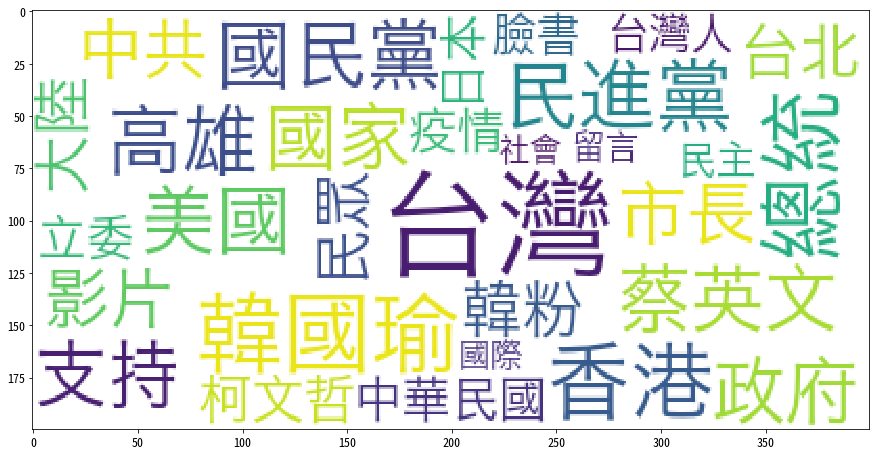

In [575]:
mtd=score['score'][:30].to_dict()
font="Hiragino Sans GB.ttc"
wordcloud = WordCloud(background_color='white',font_path=font, max_words=80).generate_from_frequencies(mtd)
# plt.title('女性用戶熱門標籤',fontsize=20)
plt.imshow(wordcloud)

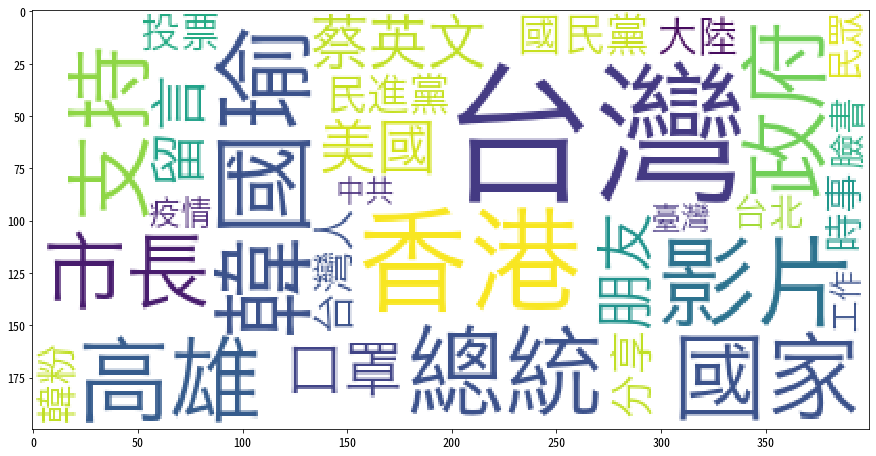

In [577]:
ftd=score['score'][:30].to_dict()
font="Hiragino Sans GB.ttc"
wordcloud = WordCloud(background_color='white',font_path=font, max_words=80).generate_from_frequencies(ftd)
# plt.title('女性用戶熱門標籤',fontsize=20)
plt.imshow(wordcloud)